In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# gpus = tf.config.list_physical_devices('GPU')
# if gpus:
#   # Restrict TensorFlow to only allocate 500MB of memory on the first GPU
#   try:
#     tf.config.set_logical_device_configuration(
#         gpus[0],
#         [tf.config.LogicalDeviceConfiguration(memory_limit=768)])
#     logical_gpus = tf.config.list_logical_devices('GPU')
#     print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
#   except RuntimeError as e:
#     # Virtual devices must be set before GPUs have been initialized
#     print(e)

1 Physical GPUs, 1 Logical GPUs


In [2]:
# gpus = tf.config.list_physical_devices('GPU')
# if gpus:
#   # Restrict TensorFlow to only use the first GPU
#   try:
#     tf.config.set_visible_devices(gpus[0], 'GPU')
#     logical_gpus = tf.config.list_logical_devices('GPU')
#     print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")
#   except RuntimeError as e:
#     # Visible devices must be set before GPUs have been initialized
#     print(e)

1 Physical GPUs, 1 Logical GPU


In [3]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPUs


In [4]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'),
 PhysicalDevice(name='/physical_device:XLA_GPU:0', device_type='XLA_GPU')]

In [5]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [6]:
tf.test.is_built_with_cuda()

True

In [7]:
# physical_devices = tf.config.experimental.list_physical_devices('GPU')
# assert len(physical_devices) > 0, "Not enough GPU hardware devices available"
# tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [8]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'),
 PhysicalDevice(name='/physical_device:XLA_GPU:0', device_type='XLA_GPU')]

In [9]:
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.cifar10.load_data()

In [10]:
X_train.shape

(50000, 32, 32, 3)

In [11]:
y_train.shape

(50000, 1)

In [12]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [13]:
def plot_sample(index):
    plt.figure(figsize=(10,1))
    plt.imshow(X_train[index])

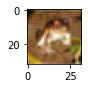

In [14]:
plot_sample(0)

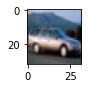

In [15]:
plot_sample(4)

In [16]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

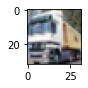

In [17]:
plot_sample(1)

In [18]:
y_train[1]

array([9], dtype=uint8)

In [19]:
y_train[1][0]

9

In [20]:
classes[y_train[1][0]]

'truck'

In [21]:
y_train[1][0]

9

In [22]:
X_train_scaled=X_train/255 #Dividing by 255 because RGB values range from 0-255. This also helps in scaling the data of the model.
X_test_scaled=X_test/255

In [23]:
X_train_scaled.shape

(50000, 32, 32, 3)

In [24]:
X_train_scaled

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [25]:
y_train_categorical=keras.utils.to_categorical(
    y_train, num_classes=10,dtype='float32'
)
y_train_categorical

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [26]:
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes=10, dtype='float32'
)
y_test_categorical

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

### If we do not mention any activation funtion in the output layer of the Neural Network, then it will use linear function i.e it will not use any activation function at all. 'Sigmoid' function is good with classification problems.

 ### Difference between 'sparse_categorical_crossentropy' and 'categorical_crossentropy'. When we have like discrete values like in 'y_train'(for this notebook) then we use  'sparse_categorical_crossentropy' and when we have values like in 'y_train_categorical' which are one_hot_encoded values then we use 'categorical_crossentropy'.

In [27]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:
model.fit(X_train_scaled,y_train_categorical,epochs=1)

1563/1563 [==============================] - 30s 18ms/step - loss: 1.8144 - accuracy: 0.3526


In [34]:
model.fit(X_train_scaled,y_train_categorical,epochs=2)

InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.

In [29]:
classes[np.argmax(model.predict(X_test_scaled)[0])]

'bird'

In [30]:
classes[y_test[0][0]]

'cat'

In [31]:
classes[np.argmax(model.predict(X_test_scaled)[4])]

'deer'

In [32]:
classes[y_test[4][0]]

'frog'

In [33]:
model.evaluate(X_test_scaled,y_test_categorical)

313/313 [==============================] - 3s 9ms/step - loss: 1.8167 - accuracy: 0.3549


[1.8166636228561401, 0.3549000024795532]

In [35]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  1


In [36]:
tf.debugging.set_log_device_placement(True)

# Create some tensors
a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
c = tf.matmul(a, b)

print(c)


tf.Tensor(
[[22. 28.]
 [49. 64.]], shape=(2, 2), dtype=float32)


In [37]:
def get_model():
    model=keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
    ])

    model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [39]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    cpu_model=get_model()
    cpu_model.fit(X_train_scaled,y_train_categorical, epochs=1)

1563/1563 [==============================] - 79s 50ms/step - loss: 1.8131 - accuracy: 0.3551
1min 19s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [40]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
    gpu_model=get_model()
    gpu_model.fit(X_train_scaled,y_train_categorical, epochs=1)

1563/1563 [==============================] - 28s 18ms/step - loss: 1.8122 - accuracy: 0.3535
29.4 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [41]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
    gpu_model=get_model()
    gpu_model.fit(X_train_scaled,y_train_categorical, epochs=1)

1563/1563 [==============================] - 32s 19ms/step - loss: 1.8097 - accuracy: 0.3579
53 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


## Exercise

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.7.0


In [5]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

1 Physical GPUs, 1 Logical GPUs


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 15s 3us/step


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
train_images.shape

(60000, 28, 28)

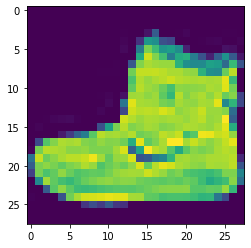

In [7]:
plt.imshow(train_images[0])

In [8]:

train_labels[0]

9

In [9]:


class_names[train_labels[0]]



'Ankle boot'

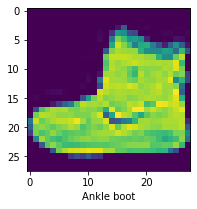

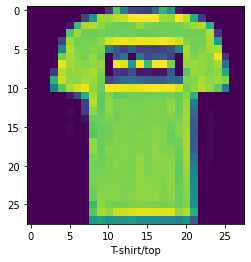

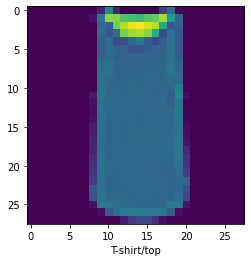

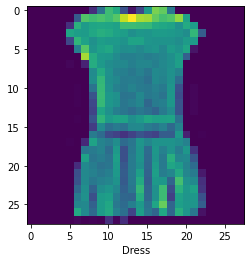

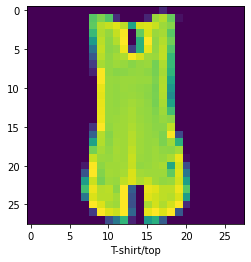

In [10]:


plt.figure(figsize=(3,3))
for i in range(5):
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
    plt.show()



In [11]:


train_images_scaled = train_images / 255.0
test_images_scaled = test_images / 255.0



In [15]:


def get_model(hidden_layers=1):
    layers = [keras.layers.Flatten(input_shape=(28,28))]
    
    for i in range(hidden_layers):
        layers.append(keras.layers.Dense(500, activation='relu'),)
        
    layers.append(keras.layers.Dense(10, activation='sigmoid'))
    
    # Your code goes here-----------START
    # Create Flatten input layers
    # Create hidden layers that are equal to hidden_layers argument in this function
    # Create output 
    # Your code goes here-----------END
    model = keras.Sequential(layers)
    
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model



In [27]:
model = get_model(1)
model.fit(train_images_scaled, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.4743 - accuracy: 0.8317
Epoch 2/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.3607 - accuracy: 0.8683
Epoch 3/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.3193 - accuracy: 0.8818
Epoch 4/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2982 - accuracy: 0.8888
Epoch 5/5
1875/1875 [==============================] - 27s 14ms/step - loss: 0.2813 - accuracy: 0.89490s - loss: 0.2814 - accura


In [28]:
model.predict(test_images_scaled)[2]

array([6.2705707e-03, 9.9999940e-01, 3.2040913e-05, 8.4841521e-03,
       1.0437313e-02, 1.2802583e-07, 6.5804052e-04, 1.2648921e-12,
       2.5119385e-05, 5.5213856e-09], dtype=float32)

In [30]:
test_labels[2]

1

## 5 Epochs performance comparison for 1 hidden layer(GPU)

In [31]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
    gpu_model=get_model(1)
    gpu_model.fit(train_images_scaled,train_labels, epochs=1)

1875/1875 [==============================] - 29s 14ms/step - loss: 0.4745 - accuracy: 0.8314
32.3 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


## 5 Epochs performance comparison for 1 hidden layer(CPU)

In [37]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    cpu_model=get_model(1)
    cpu_model.fit(train_images_scaled,train_labels, epochs=1)

1875/1875 [==============================] - 16s 8ms/step - loss: 0.4747 - accuracy: 0.8302
16.1 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


## 5 Epocs performance comparison with 5 hidden layers(CPU and then GPU)

In [36]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    cpu_model=get_model(5)
    cpu_model.fit(train_images_scaled,train_labels, epochs=1)

1875/1875 [==============================] - 45s 24ms/step - loss: 0.5156 - accuracy: 0.8144
45.7 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [35]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
    gpu_model=get_model(5)
    gpu_model.fit(train_images_scaled,train_labels, epochs=1)

1875/1875 [==============================] - 39s 20ms/step - loss: 0.5202 - accuracy: 0.8137
40.1 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


## The performance table of my CPU(i5 8th gen) and GPU(MX110).

| Hidden Layers 	| CPU  	| GPU  	|   	|   	|
|---------------	|------	|------	|---	|---	|
| 1             	| 16.1 	| 16.1 	|   	|   	|
| 5             	| 45.7 	| 40.1 	|   	|   	|
|               	|      	|      	|   	|   	|